## Preprocessing

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

train=pd.read_csv("../data/raw/train.csv")
print(train.head(), "\n")
print(train.shape, "\n")
print(train.dtypes, "\n")
print(train.isna().sum(), "\n")
print(train.columns.tolist())

         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10 

(913000, 4) 

date     object
store     int64
item      int64
sales     int64
dtype: object 

date     0
store    0
item     0
sales    0
dtype: int64 

['date', 'store', 'item', 'sales']


In [ ]:
# parse and sort date
train['date'] = pd.to_datetime(train['date'])
train = train.sort_values(['store', 'item', 'date']) #order by store, item, date

In [31]:
# target basics
print(train['sales'].describe(), "\n")
print("zeros:", (train['sales'] == 0).mean(), "\n")
print(train.isna().sum(), "\n")

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64 

zeros: 1.095290251916758e-06 

date         0
store        0
item         0
sales        0
year         0
month        0
dayofweek    0
dtype: int64 



In [ ]:
# Append the data with simple derived time features
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['dayofweek'] = train['date'].dt.dayofweek
train.to_csv("../data/processed/train_clean.csv", index=False)

## Exploratory Data Analysis

In [29]:
# Load the cleaned dataset
train = pd.read_csv("../data/processed/train_clean.csv", parse_dates=['date'])

print("Shape:", train.shape, "\n")
print(train.info())

Shape: (913000, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       913000 non-null  datetime64[ns]
 1   store      913000 non-null  int64         
 2   item       913000 non-null  int64         
 3   sales      913000 non-null  int64         
 4   year       913000 non-null  int64         
 5   month      913000 non-null  int64         
 6   dayofweek  913000 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 48.8 MB
None


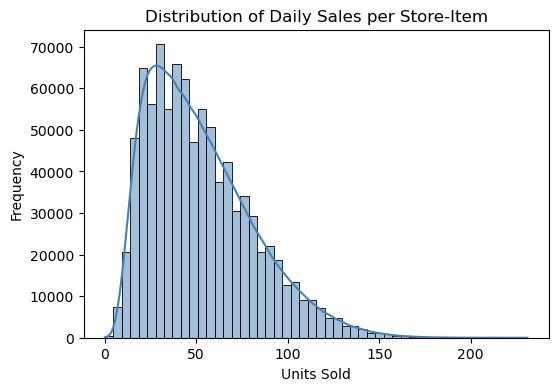

In [30]:
# Distribution of sales
plt.figure(figsize=(6, 4))
sns.histplot(train['sales'], bins=50, kde=True, color="steelblue")
plt.title("Distribution of Daily Sales per Store-Item")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()

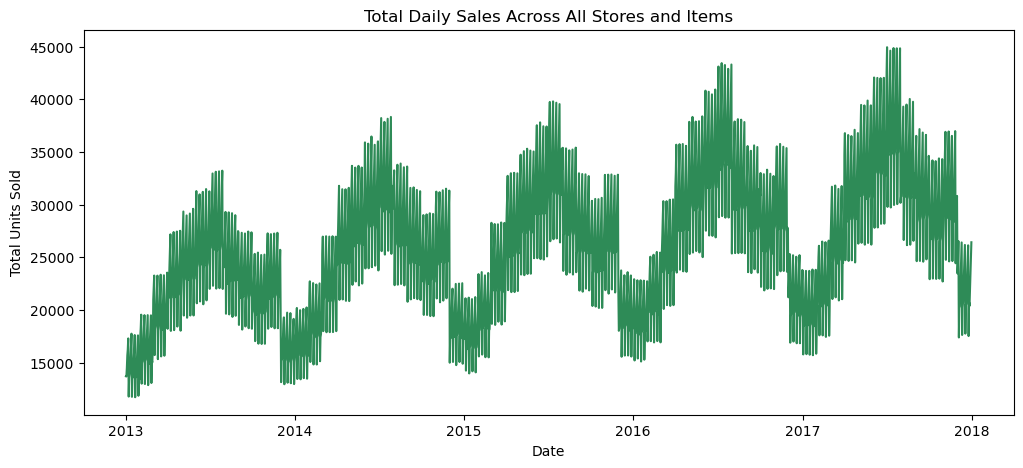

In [39]:
# Total daily sales across all stores and items
daily_sales = train.groupby('date')['sales'].sum()
plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, color="seagreen")
plt.title("Total Daily Sales Across All Stores and Items")
plt.xlabel("Date")
plt.ylabel("Total Units Sold")
plt.show()

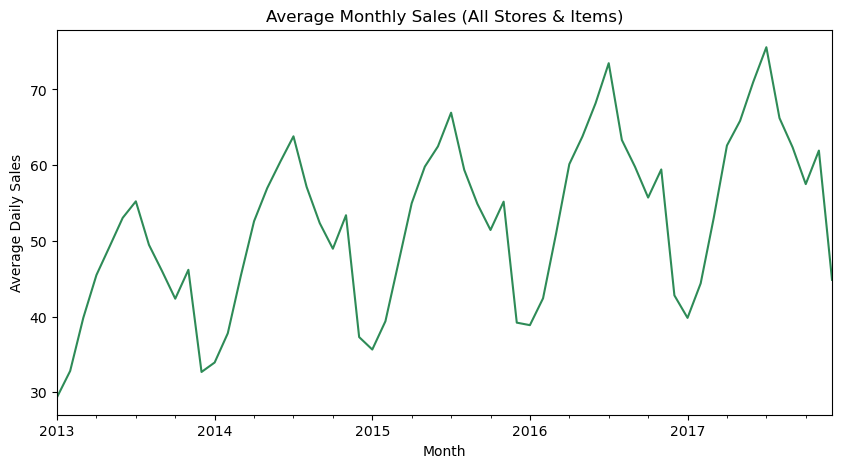

In [42]:
# Total monthly sales across all stores and items
monthly_sales = train.groupby(train['date'].dt.to_period('M'))['sales'].mean()
plt.figure(figsize=(10, 5))
monthly_sales.plot(color="seagreen")
plt.title("Average Monthly Sales (All Stores & Items)")
plt.xlabel("Month")
plt.ylabel("Average Daily Sales")
plt.show()

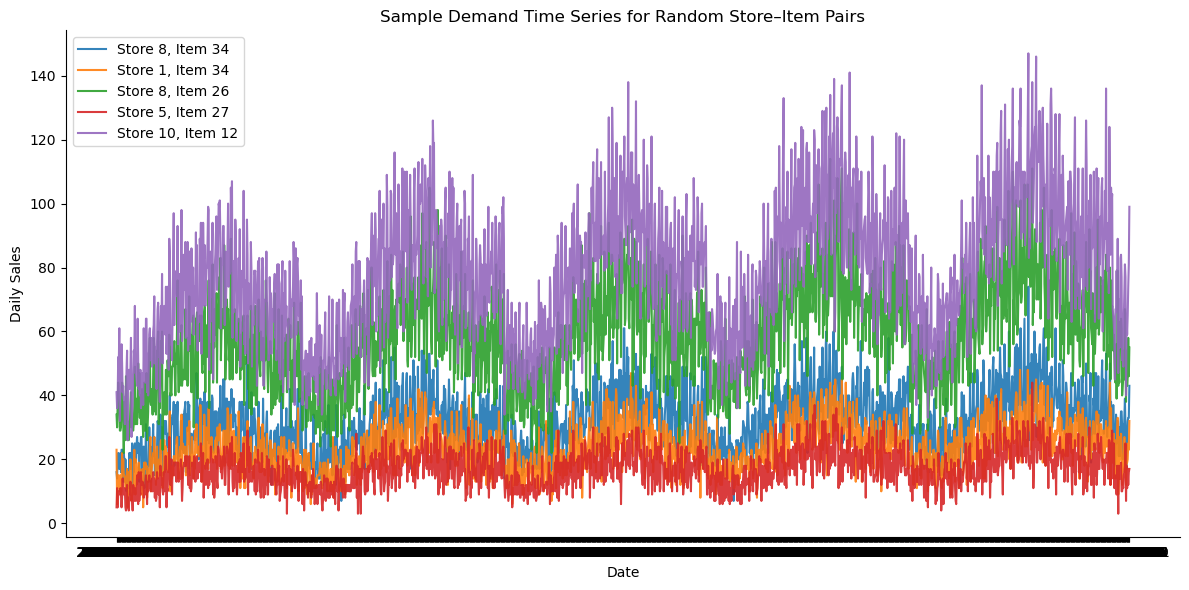

In [61]:
# Sample demand series for random store–item pairs
import seaborn as sns

sample_pairs = random.sample(
    list(train[['store', 'item']].drop_duplicates().itertuples(index=False, name=None)), 5
)

plt.figure(figsize=(12, 6))

# Get tab10 palette with as many colors as samples
colors = sns.color_palette("tab10", n_colors=len(sample_pairs))

for (store, item), color in zip(sample_pairs, colors):
    subset = train[(train['store'] == store) & (train['item'] == item)]
    plt.plot(subset['date'], subset['sales'], label=f"Store {store}, Item {item}", color=color, alpha=0.9)

plt.legend()
plt.title("Sample Demand Time Series for Random Store–Item Pairs")
plt.xlabel("Date")
plt.ylabel("Daily Sales")
sns.despine()
plt.tight_layout()
plt.show()


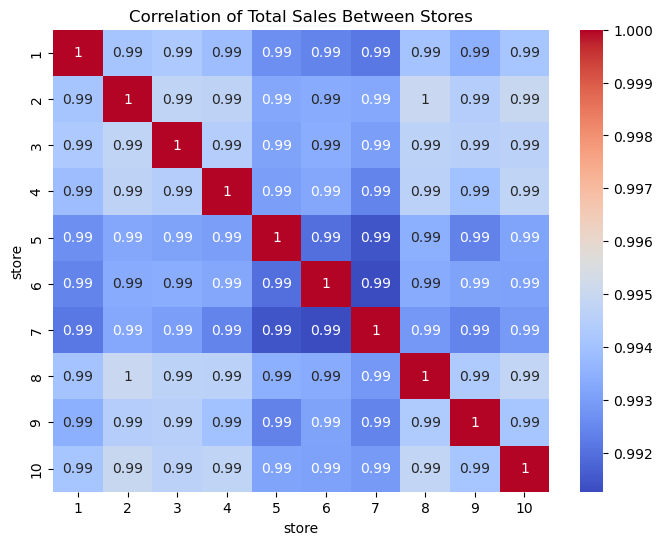

In [60]:
# Correlation between stores
pivot_store = train.groupby(['date', 'store'])['sales'].sum().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_store.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Total Sales Between Stores")
plt.show()